<a href="https://colab.research.google.com/github/RaianaSeixas/Raianars_paper_one_revisited/blob/main/Hybrid/Hybrid_Frannk_Shubert3_0_75_0_25_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz
import Go2Ann

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 323 (delta 3), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (323/323), 312.84 KiB | 1.65 MiB/s, done.
Resolving deltas: 100% (184/184), done.
/content/optim_raianars_Insight


In [2]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 242 (delta 60), reused 0 (delta 0), pack-reused 129
Receiving objects: 100% (242/242), 653.68 KiB | 3.37 MiB/s, done.
Resolving deltas: 100% (132/132), done.
/content/optim_raianars_Insight/Raianars_paper_One


In [3]:
#import Go2Ann
#import de_soma_Insight
#import de_bounds_matriz
#import Function
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices
import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

############################### DADOS DE ENTRADA 

Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=2000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100

fator = 1.0/3.0; 



In [4]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz

Cloning into 'optim_raianars_Insight'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 323 (delta 3), reused 0 (delta 0), pack-reused 314
Receiving objects: 100% (323/323), 312.84 KiB | 1.64 MiB/s, done.
Resolving deltas: 100% (184/184), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight


In [5]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

Cloning into 'Raianars_paper_One'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (113/113), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 242 (delta 60), reused 0 (delta 0), pack-reused 129
Receiving objects: 100% (242/242), 653.68 KiB | 2.51 MiB/s, done.
Resolving deltas: 100% (132/132), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One


In [6]:
RUNS=50
mut=0.75
crossp=0.25
Fi=mut;CRi=crossp;# para impressão

############################### Função
import Function
#'''  
############################### Função
dim=10
#fchoice='Rastrigin' #fchoice='Michalewicz' #fchoice='Schwefel' #'Schwefel_222' Ackley
fchoice='Shubert3'
Fun=Function.Shubert3
MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)

#'''
#####################################
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS

bounds=[]
for k in range(len(MAX)):
  bounds.append((MIN[k],MAX[k]))

In [7]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

Cloning into 'ANN_read_matrix'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_paper_One/ANN_read_matrix


In [8]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [9]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [10]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [11]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [12]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [13]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [14]:
##################################### 

TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO


PAR=dim
fobj=Fun

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
NPAR1=int(fator*NPAR);print('Npar1=',NPAR1);print('frac=',fator)
NPAR2=NPAR-NPAR1;print('Npar2=',NPAR2);print('Npar=',NPAR)

cols=dim

X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
for i in range(NPAR1):
  for j in range(cols):
    r=np.random.random()
    X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
for i in range(NPAR2):
  for j in range(cols):
    r=np.random.random()
    X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  #bounds=[(p, p)] * PONTOS


Npar1= 33
frac= 0.3333333333333333
Npar2= 67
Npar= 100


In [15]:

start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for iii in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)
    X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
    for i in range(NPAR1):
      for j in range(cols):
        r=np.random.random()
        X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
        
    X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
    for i in range(NPAR2):
      for j in range(cols):
        r=np.random.random()
        X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X1])
    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X1,Fitness)
    nrow,ncol=X1.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo
  
    MAT_INDo=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1
    

    
    for k in range(ITE):

      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut, crossp,NPAR2, its,fobj,X2)
      
      
      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)

      MAT_IND=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST1);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]
      X1[0,:] = BEST2;
      X1[NPAR1-1,:] = BEST1;
      X2[0,:] = BEST1;
      X2[NPAR2-1,:] = BEST2;
    print('k=',iii,'time=',(time.time()-start_time)/60, 'FOBEST=',FOBEST)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

k= 0 time= 2.3329723636309305 FOBEST= -148.37950025710603
k= 1 time= 4.67239713271459 FOBEST= -148.37950025710603
k= 2 time= 6.989287455876668 FOBEST= -148.37950025710603
k= 3 time= 9.32440007130305 FOBEST= -148.37950025710603
k= 4 time= 11.660442447662353 FOBEST= -148.37950025710603
k= 5 time= 13.999885825316111 FOBEST= -148.37950025710606
k= 6 time= 16.335786128044127 FOBEST= -148.37950025710606
k= 7 time= 18.674477978547415 FOBEST= -148.37950025710606
k= 8 time= 21.013696459929147 FOBEST= -148.37950025710603
k= 9 time= 23.355788791179656 FOBEST= -148.37950025710603
k= 10 time= 25.689635928471883 FOBEST= -148.37950025710603
k= 11 time= 28.026257093747457 FOBEST= -148.37950025710603
k= 12 time= 30.3597052693367 FOBEST= -148.37950025710606
k= 13 time= 32.69610942204793 FOBEST= -148.37950025710606
k= 14 time= 35.027107385794324 FOBEST= -148.37950025710603
k= 15 time= 37.349520500500994 FOBEST= -148.37950025710606
k= 16 time= 39.67871655225754 FOBEST= -148.37950025710603
k= 17 time= 42.0

In [16]:
#len(X2[1,:])
print(cols)

10


In [17]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [18]:
pd.set_option('display.max_columns', 30)  
print(df)

      DIVERSIDADE (DI)   DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X    NP  \
0         1.819978e+01  1.020203e+00   0.00033         2.0      0.0  33.0   
1         1.737977e+01  9.742367e-01   0.00066         2.0      2.0  33.0   
2         1.720439e+01  9.644057e-01   0.00099         2.0      2.0  33.0   
3         1.681217e+01  9.424191e-01   0.00132         2.0      0.0  33.0   
4         1.683634e+01  9.437739e-01   0.00165         2.0      2.0  33.0   
...                ...           ...       ...         ...      ...   ...   
1995      1.205774e-08  6.759059e-10   0.65868         2.0      0.0  33.0   
1996      1.205774e-08  6.759059e-10   0.65901         2.0      0.0  33.0   
1997      1.205774e-08  6.759059e-10   0.65934         2.0      0.0  33.0   
1998      1.205774e-08  6.759059e-10   0.65967         2.0      0.0  33.0   
1999      1.205774e-08  6.759059e-10   0.66000         2.0      0.0  33.0   

            Fo           CRo        fmin        fmax  AD_fmin  AD_fmax  \
0

Text(0, 0.5, 'CR')

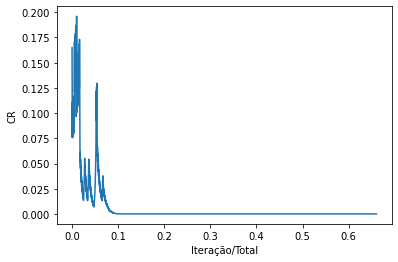

In [19]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

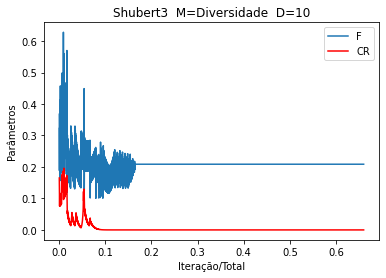

In [20]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'Shubert3_Diversidade_D=10')

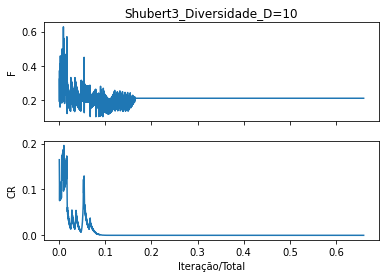

In [21]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [22]:
nome='_ANN_Div3x4_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('H-FRANNK - ','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1])
print('MIN __:',MINFO)
print('MAX__: ',MAXFO)
print('STD __:',STD)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

H-FRANNK -  TOTAL= 100000 Iterações= 2000 Dim= 10 Min/Max= -10 / 10 _ Shubert3
_ANN_Div3x4_Fo-0.75_CRo-0.25_D-10_Interv-2000 

MÉDIA:  -148.379500257106
MIN __: -148.37950025710606
MAX__:  -148.37950025710603
STD __: 2.0885605716641563e-14
Tempo Médio= 140.144 segundos ---
50 Rodadas

BEST:  [   5.16908562    5.16908562   -1.11409968    5.16908562   -1.11409969
   -7.39728499   -1.11409969   -7.397285     -1.11409969   -1.11409968
 -148.37950026]
